#**Descriptive Analysis**<br>
**<font color='#008000'>In Descriptive Analyis we are describing, presenting, summarizing and organizing our data (population), either through numerical calculations or graphs or tables.**

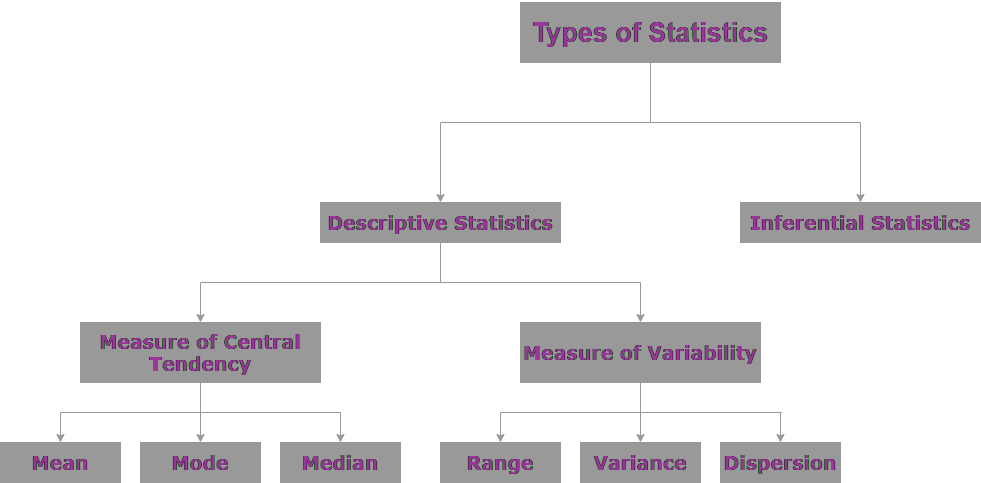

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

path = r'/content/data.csv'
df = pd.read_csv(path)
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


#**Mean** 
The mean (average) of a data set is found by adding all numbers in the data set and then dividing by the number of values in the set.<font color='darkblue'>$$ \mu=\frac{1}{n} \sum_{i=i}^{n} x_{i} $$

![image](https://cdn.wallstreetmojo.com/wp-content/uploads/2019/03/mean-formula-example-1.3-1.png)

In [ ]:
#Let us work with the Monthly_HH_Income to calculate the mean.

monthlyIncomeS = sum(df['Mthly_HH_Income'])

numberOfObs = df['Mthly_HH_Income'].__len__()

mthMean = monthlyIncomeS / numberOfObs

print('The mean for Annual_HH_Income is {}'.format(mthMean))

The mean for Annual_HH_Income is 41558.0


#**Median**
The median is the middle value when a data set is ordered from least to greatest.<br>
**Formula:**<font color='red'>$$Median = l + \frac{[\frac{n}{2} - c]}{f} \times n$$

In [ ]:
#Let us calculate the median value for Mthly_HH_Income.

median=df['Mthly_HH_Income'].median()
median

35000.0

#**Mode**
The mode is the number that occurs most often in a data set.<br>
**Formula:**<font color='green'>$$Mode = l + [\frac{f_{m}-f_{1}}{2f_{m}-f_{1}-f_{2}}]\times h$$

In [ ]:
mode=df['Mthly_HH_Income'].mode()
mode

0    45000
dtype: int64

#**Plotting the mean, median and mode for the Mthly_HH_Income column.**

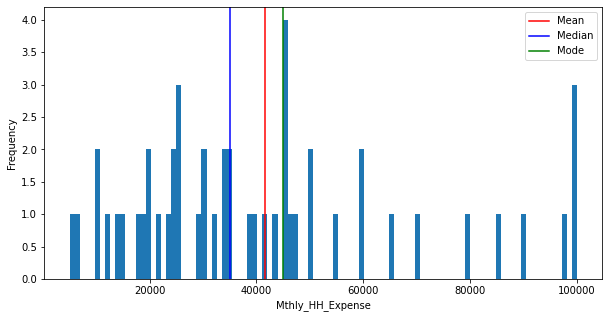

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df['Mthly_HH_Income'],bins=100)
plt.axvline(mthMean,color='red',label='Mean')
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('Mthly_HH_Expense')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#**Variance and Standard Deviation**
Variance is the average squared deviations from the mean, while standard deviation is the square root of this number. Both measures reflect variability in a distribution, but their units differ: Standard deviation is expressed in the same units as the original values (e.g., minutes or meters).

**A. Standard Deviation is as follows:** 
$$ \sigma = \sqrt {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } } $$

In [5]:
#Standar Deviation
monthlyIncome = df['Mthly_HH_Income']
std = sqrt(monthlyIncome.var())
round(std,4)

26097.909

**B. The variance is calulated as follows:** 
$$ \sigma^2 =  {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 } } $$

In [7]:
#Variance 
round(monthlyIncome.var(),4)

681100853.0612

#**Correlation - Pearson**

The Pearson correlation coefficient is probably the most widely used measure for linear relationships between two normal distributed variables and thus often just called "correlation coefficient".<br>
**Formula:** 
$$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$$
And the estimate
$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$

                  Mthly_HH_Income  ...  Emi_or_Rent_Amt
Mthly_HH_Income          1.000000  ...         0.036976
Mthly_HH_Expense         0.649215  ...         0.405280
Annual_HH_Income         0.970315  ...         0.002716
Emi_or_Rent_Amt          0.036976  ...         1.000000

[4 rows x 4 columns]


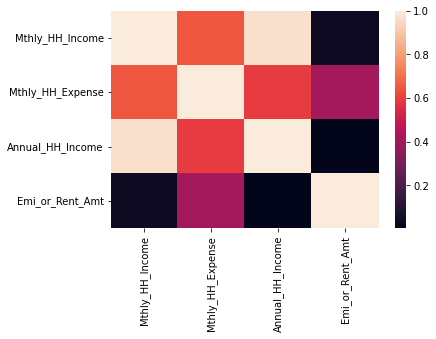

In [8]:
#checking correlation of 4 countinous variables
%matplotlib inline
corelation=df[['Mthly_HH_Income','Mthly_HH_Expense','Annual_HH_Income','Emi_or_Rent_Amt']].corr()
print(corelation)
sns.heatmap(corelation)

#**Normal Distribution**
A normal distribution in a variate X with mean mu and variance $ \sigma^2$ is a statistic distribution with probability density function.

**Formula:**
$$P(x)=\frac1{\sqrt{2\pi\sigma^2}}{exp}^\frac{x-\mu}{\sigma}
$$



**Properties of a normal distribution:**

*   The mean, mode and median are all equal.
*   The curve is symmetric at the center (i.e. around the mean, μ).

*   Exactly half of the values are to the left of center and exactly half the values are to the right.
*   The total area under the curve is 1.

**Positively and Neagtively Skewed Distribution**<br>
![image](https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png)

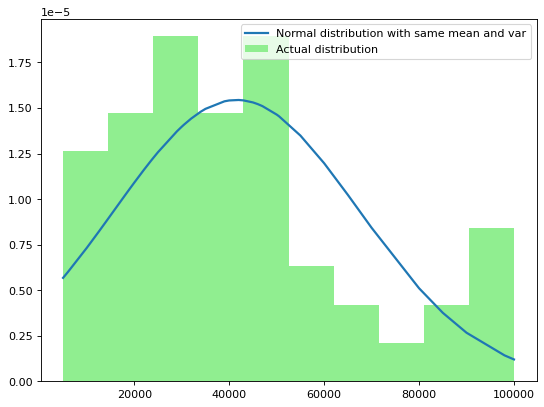

In [25]:
import scipy.stats as stats

new = df['Mthly_HH_Income']
plt.figure(figsize=(8, 6), dpi=80)

fit = stats.norm.pdf(new, np.mean(new), np.std(new))
plt.plot(new,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(new,bins = 10,density=True,label="Actual distribution",color='lightgreen')
plt.legend()
plt.show()

#**Skewness and The Mean, Median and Mode**

<font color='darkbrown'>**The distribution shown below has a positive skew. The mean is larger than the median.**<br>
![image](https://davidmlane.com/hyperstat/pictures/positive_skew.gif)<br><br>
<font color='blue'>**The distribution shown below has a negative skew. The mean is smaller than the median.**<br>
![image](https://davidmlane.com/hyperstat/pictures/negative_skew.gif)

#**Box Cox Plot**<br>
A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.<br>
**Formula:**
<font color='darkgrey;'>\begin{aligned} \psi(y, \lambda) = \begin{cases} \dfrac{y^\lambda - 1}{\lambda} &\lambda \neq 0, \\ \log y &\lambda = 0. \end{cases} \end{aligned}<br>


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.24689401204475175


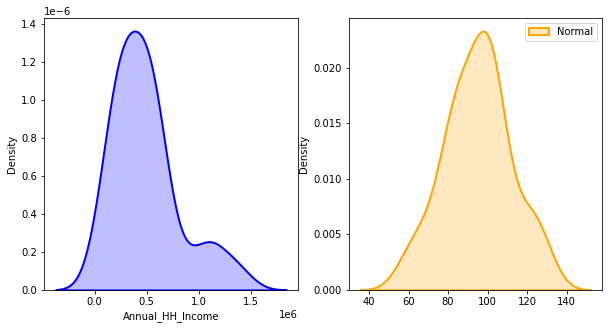

In [28]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(df['Annual_HH_Income'])

fig, ax = plt.subplots(1, 2) #creating axes to draw plots

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(df['Annual_HH_Income'], hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},label ="Non-Normal", color ="blue", ax = ax[0])
sns.distplot(fitted_data, hist = False, kde = True,
kde_kws = {'shade': True, 'linewidth': 2},label ="Normal", color ="orange", ax = ax[1])

plt.legend(loc = "upper right") #adding legends to the subplots

fig.set_figheight(5) #rescaling the subplots
fig.set_figwidth(10)
print(f"Lambda value used for Transformation: {fitted_lambda}")

#**Q-Q Plot for Normal Distribution**<br> 
**Q-Q Plots (Quantile-Quantile plots)** are plots of two quantiles against each other. A quantile is a fraction where certain values fall below that quantile. For example, the median is a quantile where 50% of the data fall below that point and 50% lie above it. The purpose of Q Q plots is to find out if two sets of data come from the same distribution. A 45 degree angle is plotted on the Q Q plot; if the two data sets come from a common distribution, the points will fall on that reference line.

##**Steps for creating a QQ Plot are as follows:**

1. Order the items from smallest to largest.
2. Draw a normal distribution curve.
3. Find the z-value (cut-off point) for each segment in Step 3.
4. Plot your data set values (Step 1) against your normal distribution cut-off points (Step 3).



![image](https://www.learnbyexample.org/wp-content/uploads/r/typical-quantile-quantile-qq-plot.png)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


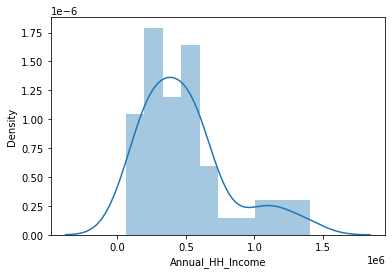

In [35]:
sns.distplot(df['Annual_HH_Income'],kde=True,bins=10)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([  64200,   79920,   97200,  112800,  147000,  167400,  196560,
          216000,  218880,  220800,  244800,  246000,  258000,  261000,
          278400,  279840,  292032,  316800,  330480,  348000,  351360,
          385200,  412800,  437400,  44544

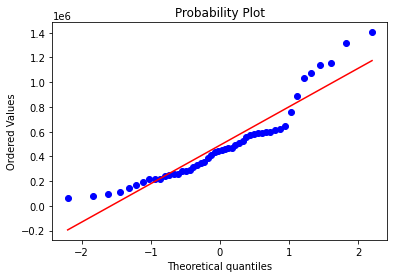

In [36]:
new = df['Annual_HH_Income']
new.argsort()
stats.probplot(new, dist="norm", plot=plt)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 58.24293824,  61.70421582,  64.96005249,  67.54329643,
          72.38061027,  74.8726426 ,  78.06452764,  79.99898498,
          80.27429016,  80.45631493,  82.63682662,  82.74154791,
          83.76816466,  84.01918284,  85.43373762,  85.54779027

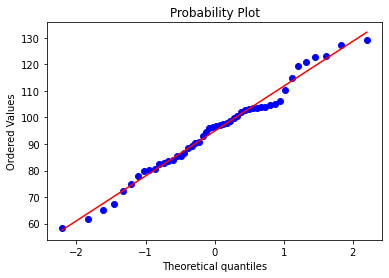

In [33]:
stats.probplot(fitted_data, dist="norm", plot=plt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


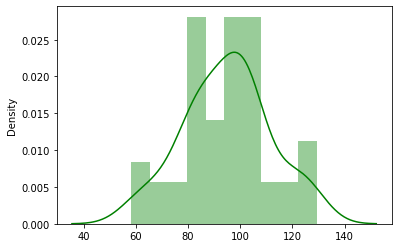

In [37]:
sns.distplot(fitted_data,kde=True,bins=10,color='green')